In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from ast import literal_eval
import re

plt.style.use('ggplot')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts/'))
if module_path not in sys.path:
    sys.path.append(module_path) #"/Volumes/tuba/herpov/tcr-pmhc-sc-project/scripts/"
from D_plot_specificity_matrix_utils import (calc_binding_concordance,
                                             epitope_sorter_index,
                                             initialize_plotting_frame,
                                             filter_low_level,
                                             peptides_per_gem,
                                             peptide_per_clonotype_by_gem_size,
                                             peptide_per_clonotype_read_counts,
                                             mhc_read_count_per_clonotype,
                                             mhc_read_count_per_clonotype_response,
                                             mhc_read_count_per_clonotype_peptide_assayed,
                                             tcr_read_count_per_clonotype_detected_response,
                                             multiple_peptides_per_gem)

# Args

In [3]:
def assign_clonotype(tcr_df):
    clonotype_variables = ['cdr3_TRA','cdr3_TRB']
    tcr_df.loc[:, clonotype_variables] = tcr_df.loc[:, clonotype_variables].fillna('unknown')
    new_clonotype = tcr_df.groupby(clonotype_variables).gem.unique().to_frame()
    new_clonotype['n_gems'] = new_clonotype.gem.apply(len)
    new_clonotype.sort_values(by='n_gems', ascending=False, inplace=True)
    dct = new_clonotype.to_dict()['gem']
    for i, k in enumerate(dct.keys(), start=1): 
        dct[k] = i
    return tcr_df.set_index(clonotype_variables).index.map(dct)

In [4]:
def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def epitope_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("'",""))

In [5]:
converters={'peptide_HLA_lst': peptide_hla_converter, 'epitope_lst': epitope_converter, 'umi_count_lst_mhc': literal_eval,'cdr3_lst_TRA': cdr3_lst_converter}

In [6]:
EXP = 'exp3'

# Input

In [7]:
INPUT = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv" #'tcr_barcode.cleaned.imputed.csv'

In [8]:
INPUT_IMPUT = 'tcr_barcode.cleaned.imputed.{}.csv'.format(EXP)
#INPUT_DISC = 'tcr_barcode.cleaned.imputed.nonimputed_discarded.csv'

# Output

# Load

In [9]:
df = pd.read_csv(INPUT) #, converters=converters

In [10]:
df_k =  pd.read_csv(INPUT_IMPUT)
#df_d =  pd.read_csv(INPUT_DISC)

# Main

In [11]:
df['epitope_rank'] = epitope_sorter_index(df)
df_k['epitope_rank'] = epitope_sorter_index(df_k)
#df_d['epitope_rank'] = epitope_sorter_index(df_d)

(credible_df, clonotype_fmt="ct", filtration="no_filtration", bc_threshold=1, tcr_threshold=1, exclude_clonotype_singlets=False, exclude_specificity_singlets=False, show=True, save_tuba=False, save_sund=False, save_report=False)

Sorted dataframe 3597
UMI filtering 1314
After filtering 1314


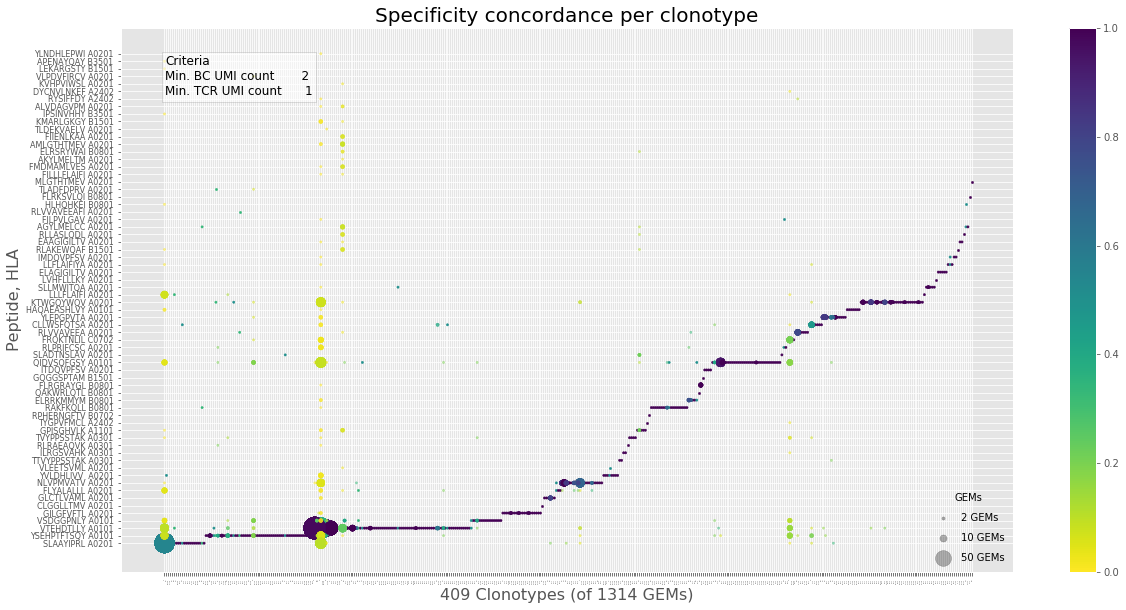

OBS! Figures are not saved!


In [12]:
peptide_per_clonotype_by_gem_size(df,
                                  clonotype_fmt='num_clonotype',
                                  filtration='exclude_single-chain_TCRs',
                                  bc_threshold=2, tcr_threshold=1,
                                  show="stats/{}/{}/".format(EXP, 'non-imputed_10x-clonotype'))

Sorted dataframe 3597
UMI filtering 1314
After filtering 1314


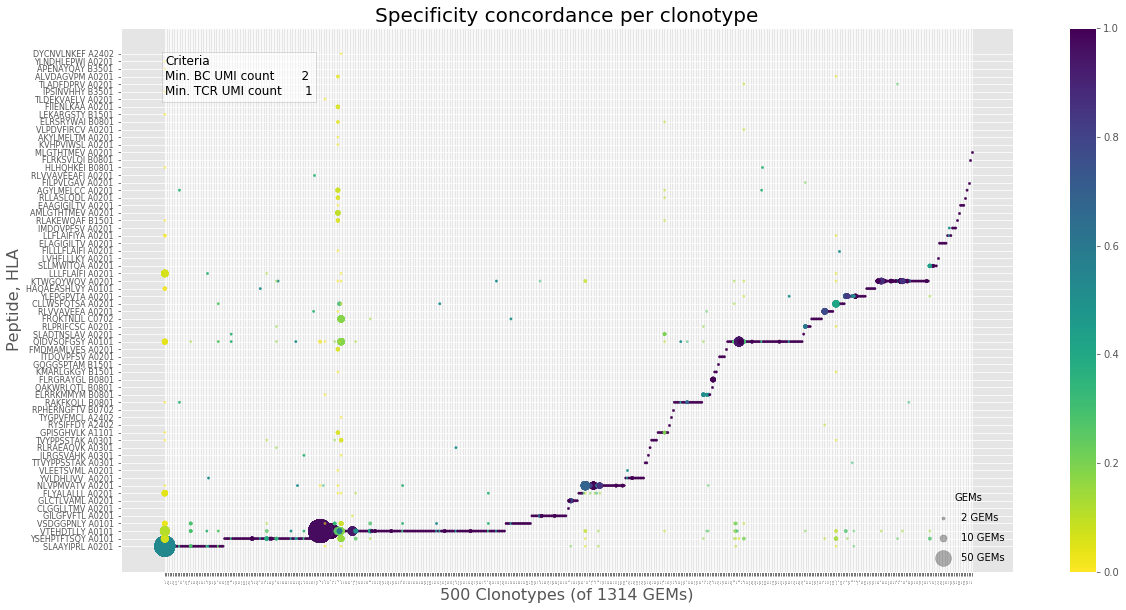

OBS! Figures are not saved!


In [13]:
df['ct'] = assign_clonotype(df)
peptide_per_clonotype_by_gem_size(df,
                                  clonotype_fmt='ct',
                                  filtration='exclude_single-chain_TCRs',
                                  bc_threshold=2, tcr_threshold=1,
                                  show="stats/{}/{}/".format(EXP, 'non-imputed_new-clonotype'))

Sorted dataframe 3597
UMI filtering 1327
After filtering 1327


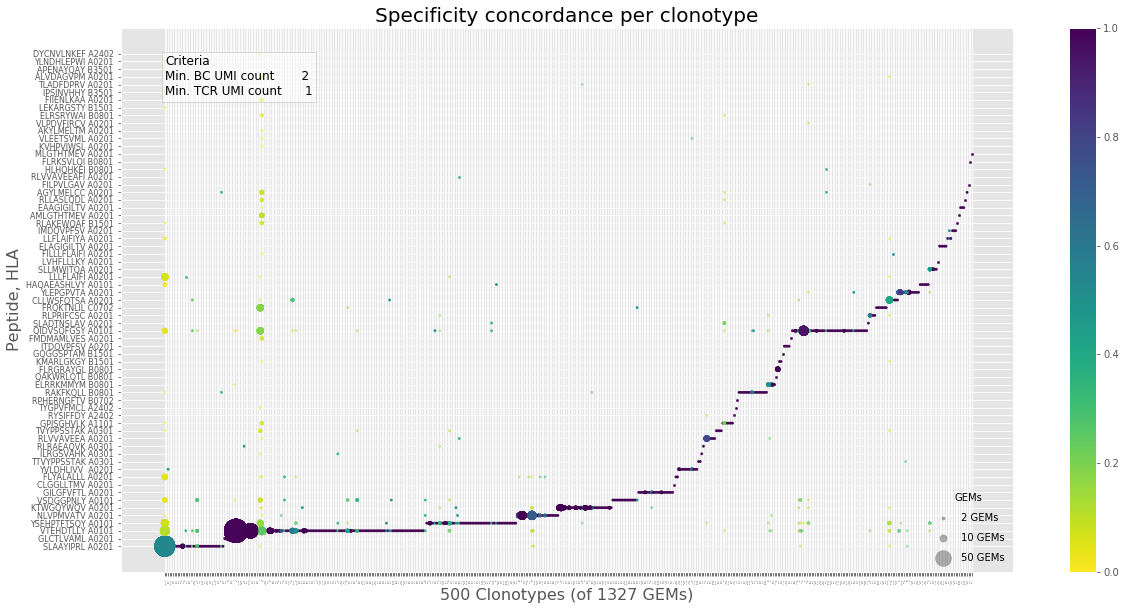

OBS! Figures are not saved!


In [14]:
peptide_per_clonotype_by_gem_size(df_k,
                                  clonotype_fmt='ct',
                                  filtration='exclude_single-chain_TCRs',
                                  bc_threshold=2, tcr_threshold=1,
                                  show="stats/{}/{}/".format(EXP, 'imputed_new-clonotype'))

In [30]:
df_k[['peptide_HLA', 'epitope', 'epitope_rank']].iloc[700:760,]

,peptide_HLA,epitope,epitope_rank
576,YSEHPTFTSQY A0101,v9,1.0
707,YSEHPTFTSQY A0101,v9,1.0
232,YSEHPTFTSQY A0101,v9,1.0
67,YSEHPTFTSQY A0101,v9,1.0
785,YSEHPTFTSQY A0101,v9,1.0
441,YSEHPTFTSQY A0101,v9,1.0
857,YSEHPTFTSQY A0101,v9,1.0
1,YSEHPTFTSQY A0101,v9,1.0
211,YSEHPTFTSQY A0101,v9,1.0
365,YSEHPTFTSQY A0101,v9,1.0


# Further tests

In [ ]:
peptide_per_clonotype_by_gem_size(df_k)

Sorted dataframe 621
UMI filtering 621
After filtering 621


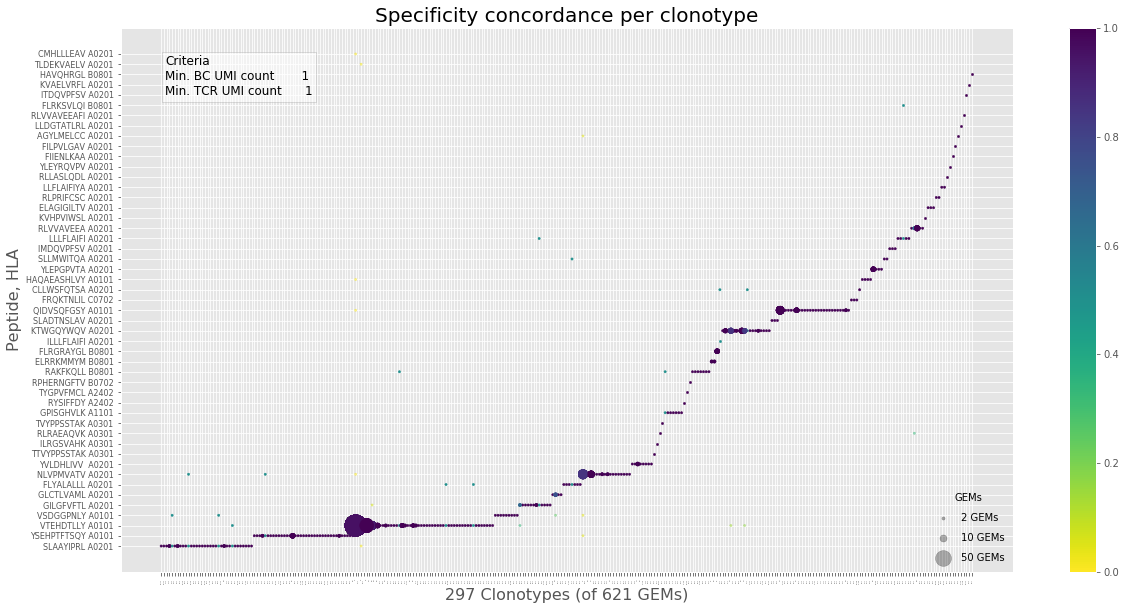

OBS! Figures are not saved!


In [13]:
peptide_per_clonotype_by_gem_size(df_d)

In [17]:
imputed_indexes = df.imputation_category.dropna().index

Sorted dataframe 621
UMI filtering 621
After filtering 621


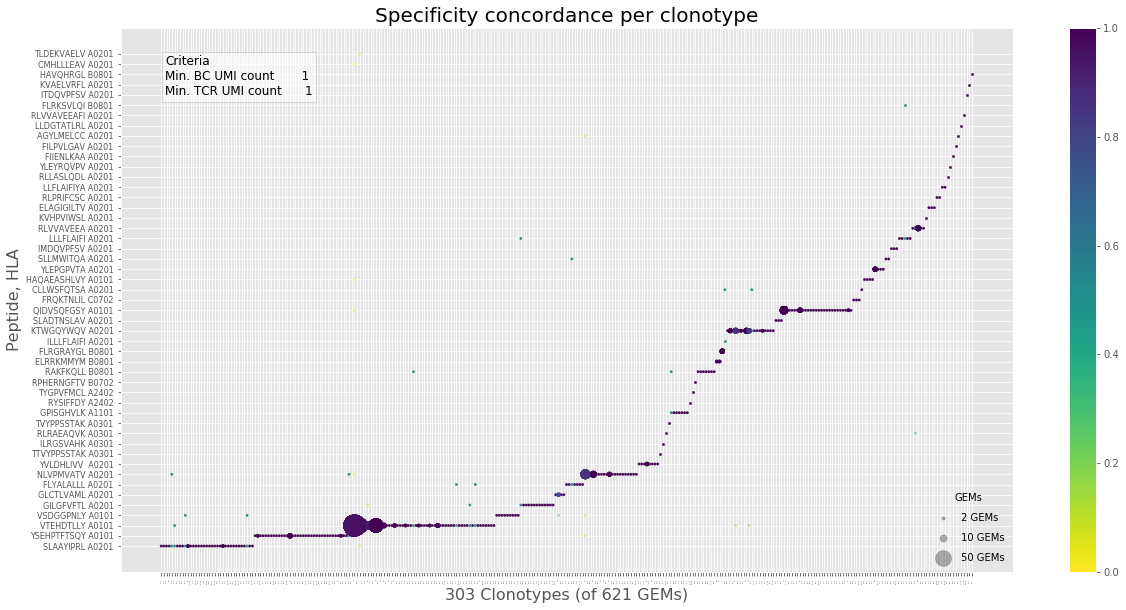

OBS! Figures are not saved!


In [18]:
peptide_per_clonotype_by_gem_size(df.loc[imputed_indexes])

In [13]:
df.loc[imputed_indexes, 'cdr3_TRA'] = df.loc[imputed_indexes, 'imputed_TRA']
df.loc[imputed_indexes, 'cdr3_TRB'] = df.loc[imputed_indexes, 'imputed_TRB']
df.loc[imputed_indexes, 'peptide_HLA'] = df.loc[imputed_indexes, 'imputed_PEP']

In [14]:
df['ct'] = assign_clonotype(df)

Sorted dataframe 3164
UMI filtering 3164
After filtering 3164


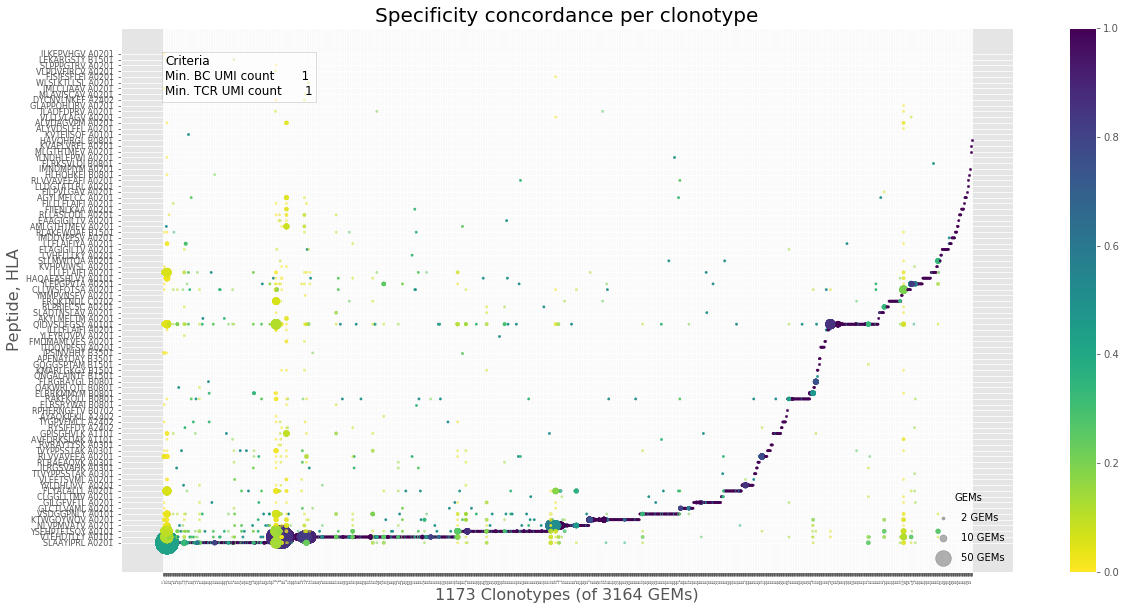

OBS! Figures are not saved!


In [16]:
peptide_per_clonotype_by_gem_size(df)

Sorted dataframe 621
UMI filtering 621
After filtering 621


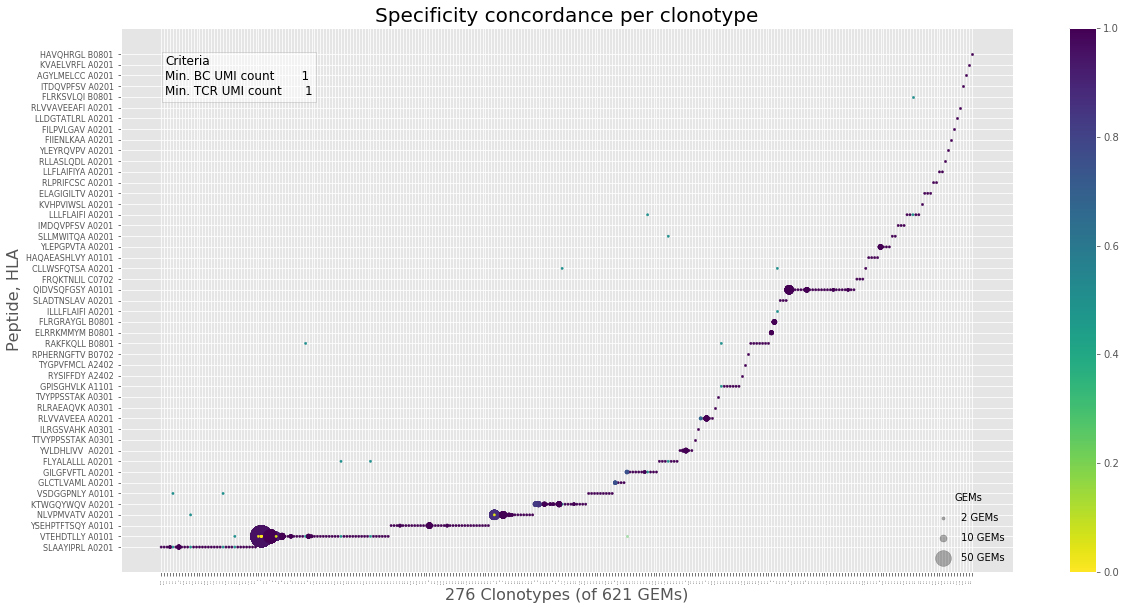

OBS! Figures are not saved!


In [16]:
peptide_per_clonotype_by_gem_size(df.loc[imputed_indexes])